# Capstone Project - Analyzing the Bias in Online Movie Ratings

## Overview:
When planning a movie outing, how trustworthy are online reviews and ratings, particularly when the platform providing the ratings also profits from ticket sales? This raises the question: is there a bias towards higher ratings to boost ticket sales?

## Goal:
Using your skills in pandas and data visualization, your task is to analyze the data and determine if Fandango's ratings in 2015 were biased towards rating movies higher to increase ticket sales. This analysis is inspired by the 538 article, "Be Suspicious Of Online Movie Ratings, Especially Fandango’s."

## Data Source:
The dataset for this project is available on 538's GitHub repository: https://github.com/fivethirtyeight/data. It includes two CSV files:

Fandango Stars and Displayed Ratings
Aggregate movie ratings from other sites like Metacritic, IMDB, and Rotten Tomatoes.

## Part One: Understanding and Cleaning the Background and Data


**Article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

#### all_sites_scores.csv

all_sites_scores.csv contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fandango = pd.read_csv("fandango_scrape.csv")

In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


The relationship between a film's popularity and its rating will be examined by creating a scatterplot to illustrate the correlation between ratings and the number of votes. The visual styling can be adjusted as necessary.

<Axes: xlabel='RATING', ylabel='VOTES'>

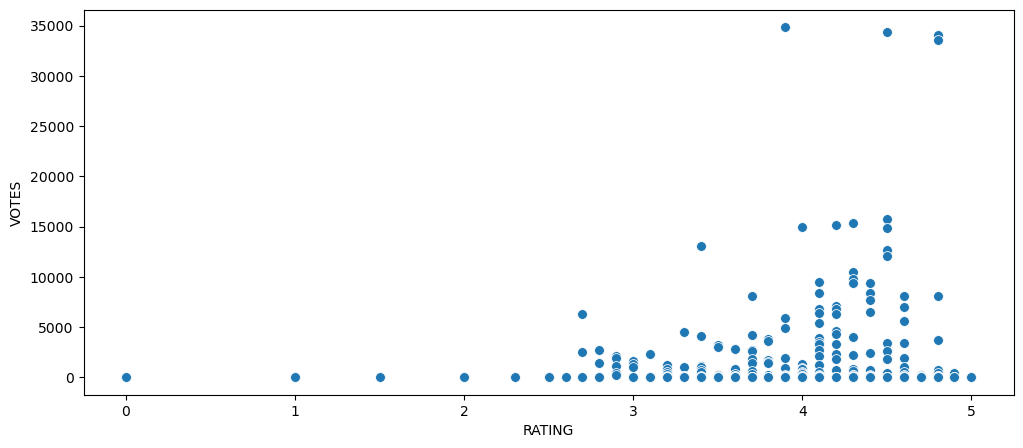

In [7]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=fandango,x='RATING',y='VOTES',s=50)

To quantify the relationship between the columns, the correlation coefficient is calculated. This will provide a numerical measure of the strength and direction of the association between the variables.

In [8]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


A new column, YEAR, has been created by extracting the year from each entry in the FILM title column, assuming the format "Film Title Name (Year)" for every row.

In [10]:
fandango['YEAR'] = fandango['FILM'].apply(lambda movie_name: movie_name.split('(')[-1])

In [11]:
fandango['YEAR'] = fandango['YEAR'].str.strip(')')
fandango['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

In [13]:
year_data = fandango['YEAR'].value_counts()

The number of movies per year in the Fandango DataFrame has been calculated to determine the distribution of movies across different years.

In [14]:
year_data = fandango['YEAR'].value_counts()
year_data

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

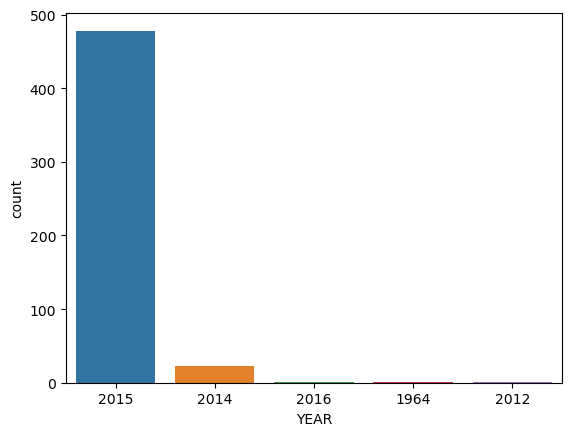

In [15]:
sns.countplot(x='YEAR',data=fandango)

The ten movies with the highest number of votes have been identified from the dataset to understand which movies attracted the most attention from viewers.

In [16]:
fandango.sort_values(by='VOTES',ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


A count of movies with zero votes has been conducted to ascertain the number of films that did not receive any votes in the dataset.

In [17]:
no_votes = fandango['VOTES'] == 0
no_votes.sum()

69

A new DataFrame containing only reviewed films has been generated by excluding any movies with zero votes from the original dataset.

In [18]:
rev_films = fandango[fandango['VOTES'] > 0]
rev_films

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


A KDE plot (Kernel Density Estimate plot) has been generated to visualize the distribution of displayed ratings (STARS) versus the true ratings derived from votes (RATING), considering that there might be discrepancies due to HTML and star rating displays. The KDEs have been clipped to the range of 0 to 5 for better visualization.

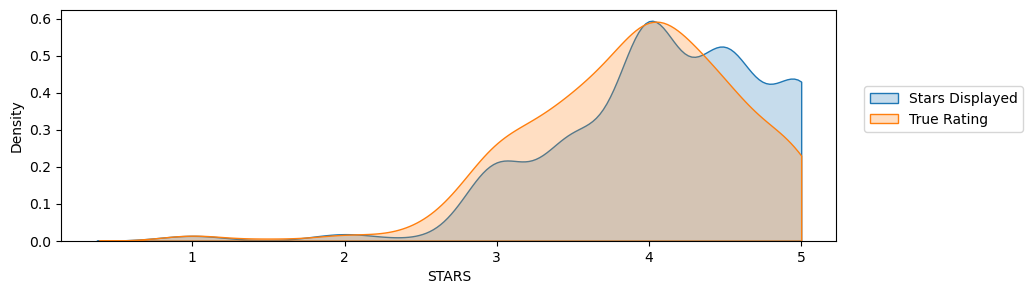

In [19]:
plt.figure(figsize=(10,3))

sns.kdeplot(data=rev_films,x='STARS',fill=True,clip=[0,5],label='Stars Displayed')
sns.kdeplot(data=rev_films,x='RATING',fill=True,clip=[0,5],label='True Rating')

plt.legend(bbox_to_anchor=(1.25,0.70))

A new column has been created to quantify the discrepancy between the displayed stars (STARS) and the true rating derived from votes (RATING). This difference has been calculated as STARS - RATING and rounded to the nearest decimal point.

In [20]:
rev_films['STARS_DIFF'] = rev_films['STARS'] - rev_films['RATING']
rev_films['STARS_DIFF'] = rev_films['STARS_DIFF'].round(2)
rev_films

C:\Users\Srivathsan M\AppData\Local\Temp\ipykernel_8444\3918045968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_films['STARS_DIFF'] = rev_films['STARS'] - rev_films['RATING']
C:\Users\Srivathsan M\AppData\Local\Temp\ipykernel_8444\3918045968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_films['STARS_DIFF'] = rev_films['STARS_DIFF'].round(2)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


A count plot has been generated to display the frequency of occurrence for each difference between the displayed stars and the true rating.

<Axes: xlabel='STARS_DIFF', ylabel='count'>

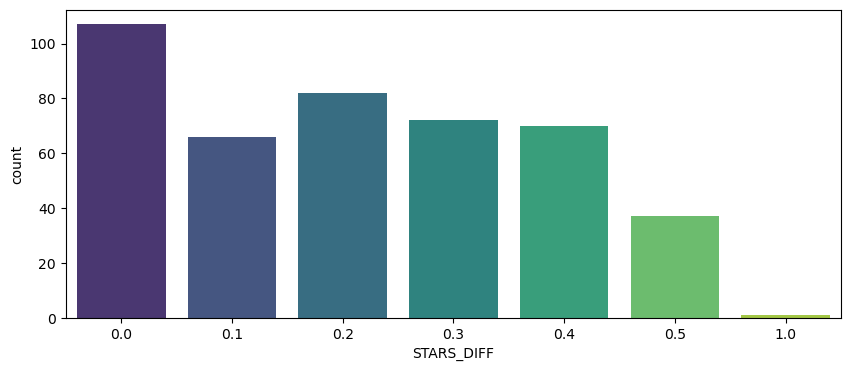

In [21]:
plt.figure(figsize=(10,4))
sns.countplot(data=rev_films,x='STARS_DIFF',palette='viridis')

A movie displaying a close to 1-star difference compared to its true rating has been identified

In [22]:
rev_films.loc[rev_films['STARS_DIFF']==1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Sites


We will compare the scores from Fandango with those from other movie sites to assess their consistency and differences.

In [23]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [24]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [25]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [26]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes
We will begin by examining the ratings from Rotten Tomatoes (RT), which includes two sets of reviews: the critics' reviews (ratings published by official critics) and user reviews.

A scatterplot has been created to explore the relationship between Rotten Tomatoes (RT) critic reviews and user reviews.

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

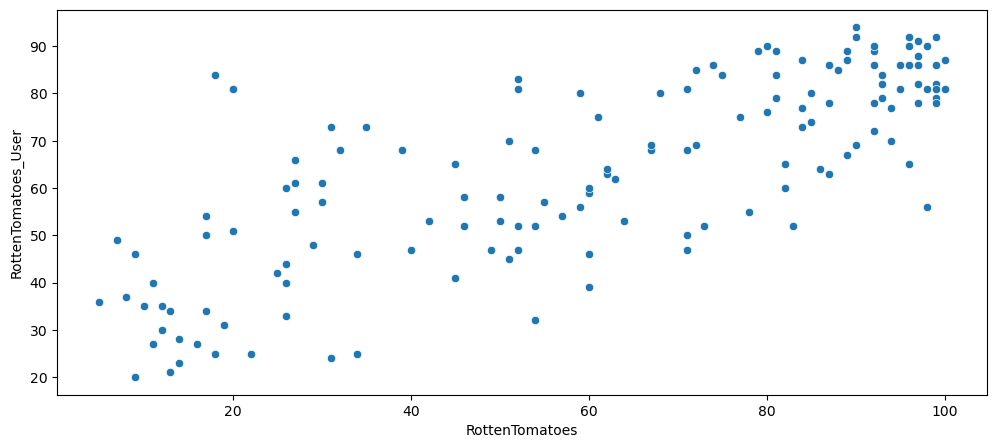

In [27]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')

The discrepancy between the Rotten Tomatoes (RT) critic ratings and user ratings has been quantified by calculating the difference between them. This difference, labeled as Rotten_Diff, is computed as Critics Score - User Score. Values closer to 0 indicate agreement between critics and users, larger positive values indicate that critics rated much higher than users, and larger negative values indicate that users rated much higher than critics.

A new column has been created to represent the difference between Rotten Tomatoes (RT) critic ratings and user ratings. This difference has been calculated by subtracting the RT User Score from the RT Critics Score.

In [40]:
all_sites['rt_diff'] =  all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rt_diff,rt_diff_abs
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14
...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19,19



To compare the overall mean difference between critic and user ratings, the absolute value of all differences has been calculated first. Then, the mean of these absolute differences has been computed, providing an average measure of the absolute difference between critic ratings and user ratings.

In [41]:
all_sites['rt_diff'].apply(abs).mean()

15.095890410958905

A distribution plot has been generated to visualize the differences between Rotten Tomatoes (RT) critic scores and user scores. This plot includes negative values to represent cases where users rated higher than critics. You can choose to use either KDE or histograms to display this distribution.

<Axes: xlabel='rt_diff', ylabel='Count'>

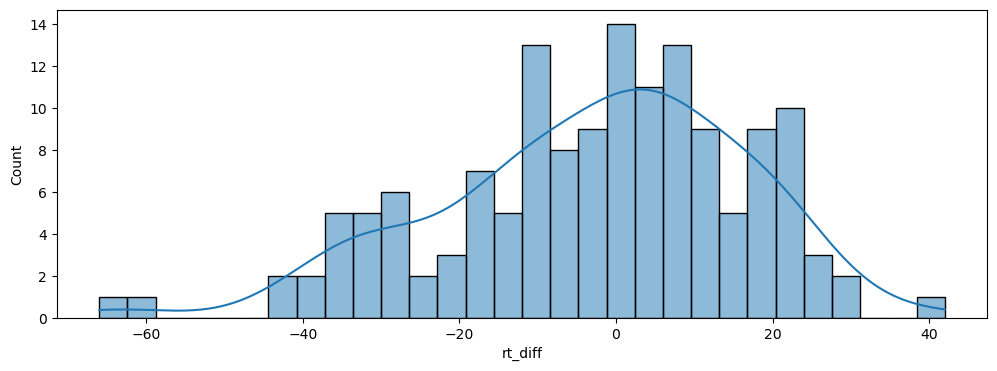

In [42]:
plt.figure(figsize=(12,4))
sns.histplot(data=all_sites, x='rt_diff',bins=30,kde=True)

This plot provides insight into the magnitude of the differences, irrespective of their direction.

In [43]:
all_sites['rt_diff_abs'] = all_sites['rt_diff'].apply(abs)

<Axes: xlabel='rt_diff_abs', ylabel='Count'>

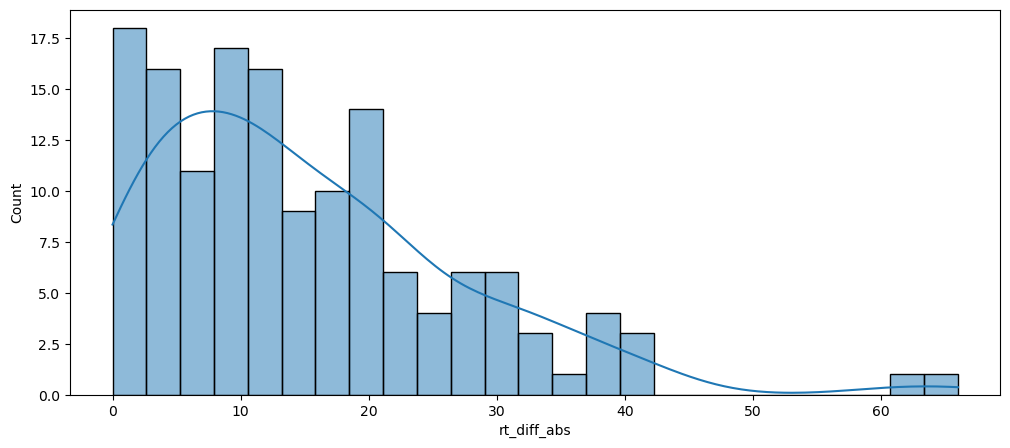

In [44]:
plt.figure(figsize=(12,5))
sns.histplot(data=all_sites,x='rt_diff_abs',bins=25,kde=True)

The top 5 movies with the largest negative difference between Rotten Tomatoes (RT) user ratings and critic ratings have been identified. Since the difference was calculated as Critics Rating - Users Rating, large negative values indicate that users rated the movie much higher on average than the critics did.

In [48]:
all_sites.sort_values(by='rt_diff',ascending=True).head(5)[['FILM','rt_diff']]

,FILM,rt_diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


The top 5 movies where critics' scores are higher than users' scores on average have been identified.

In [47]:
all_sites.sort_values(by='rt_diff',ascending=False)[['FILM','rt_diff_abs']].head()

,FILM,rt_diff_abs
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## MetaCritic

The ratings from Metacritic, which include both an average user rating and the official displayed rating, have been reviewed to understand their scoring patterns.

A scatterplot has been created to display the relationship between the Metacritic Rating and the Metacritic User rating. This visualization helps in understanding the correlation between the official ratings and user ratings on Metacritic.

(0.0, 10.0)

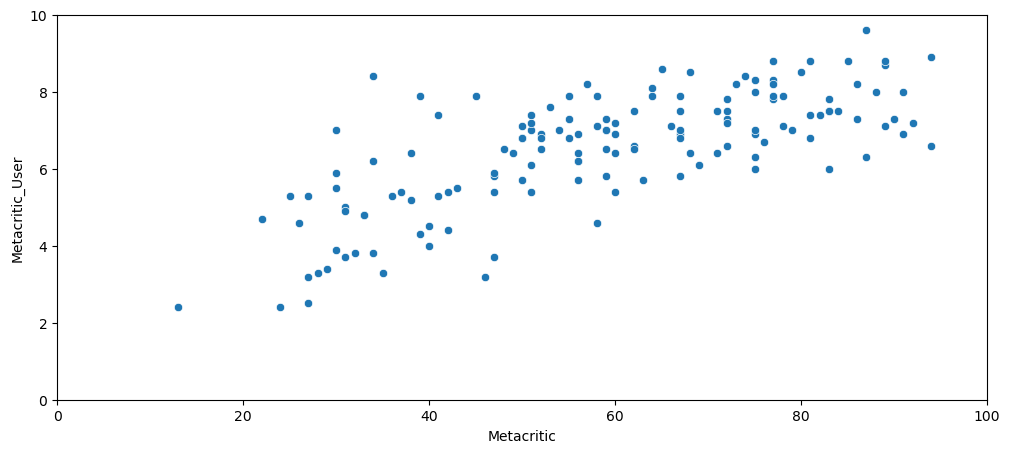

In [49]:
all_sites[['Metacritic','Metacritic_User']]
plt.figure(figsize=(12,5))
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

## IMDB


A scatterplot has been created to analyze the relationship between vote counts on Metacritic and vote counts on IMDB. This visualization helps to identify the most popular movies across these platforms based on the number of votes they received.

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

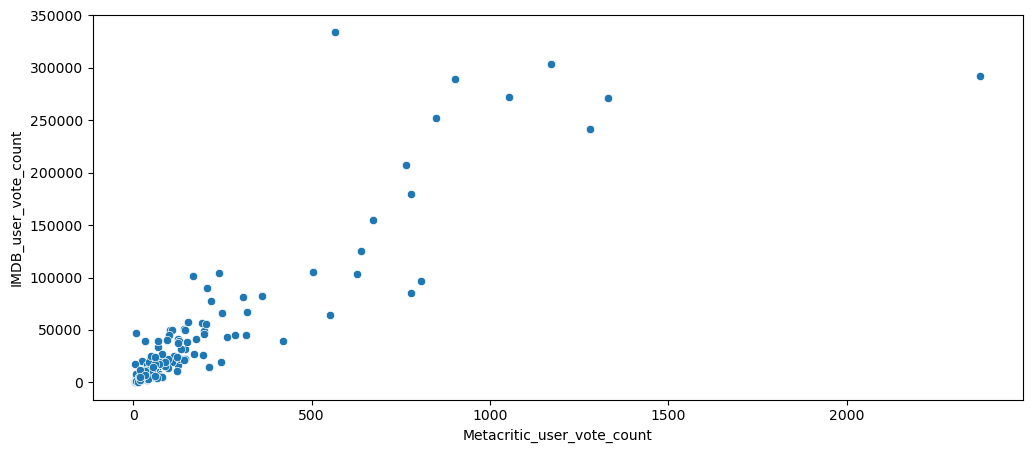

In [50]:
plt.figure(figsize=(12,5))

sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

The movie with the highest IMDB user vote count, which is also an outlier with only about 500 Metacritic ratings, has been identified.

In [51]:
all_sites['IMDB_user_vote_count'].max()
all_sites.loc[all_sites['IMDB_user_vote_count'] == all_sites['IMDB_user_vote_count'].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rt_diff,rt_diff_abs
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


The movie with the highest Metacritic user vote count has been identified.

In [52]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rt_diff,rt_diff_abs
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


## Fandago Scores vs. All Sites

The Fandango table has been combined with the All Sites table to explore whether Fandango artificially displays higher ratings to boost ticket sales. An inner merge has been performed to include only movies present in both DataFrames, using the FILM column as the key for merging.

In [62]:
combined_df = pd.merge(all_sites,rev_films,how='inner',on='FILM')

In [63]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   RottenTomatoes              145 non-null    int64  
 2   RottenTomatoes_User         145 non-null    int64  
 3   Metacritic                  145 non-null    int64  
 4   Metacritic_User             145 non-null    float64
 5   IMDB                        145 non-null    float64
 6   Metacritic_user_vote_count  145 non-null    int64  
 7   IMDB_user_vote_count        145 non-null    int64  
 8   rt_diff                     145 non-null    int64  
 9   rt_diff_abs                 145 non-null    int64  
 10  STARS                       145 non-null    float64
 11  RATING                      145 non-null    float64
 12  VOTES                       145 non-null    int64  
 13  YEAR                        145 non

In [64]:
combined_df = combined_df.drop(['rt_diff_abs','YEAR','STARS_DIFF'],axis=1)

In [65]:
combined_df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rt_diff,STARS,RATING,VOTES
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,5.0,4.5,14846
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5.0,4.5,12640
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,5.0,4.5,12055
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,5.0,4.5,1793
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,3.5,3.0,1021


### Normalizing columns to Fandango STARS and RATINGS 0-5 

Normalized columns have been added to ensure all ratings align with Fandango's 0-5 star scale. Rotten Tomatoes and Metacritic ratings, initially given as percentages (0-100), were divided by 20. IMDB ratings, on a 0-10 scale, were halved. This guarantees fair comparisons across platforms.

In [66]:
combined_df['rt_norm'] = combined_df['RottenTomatoes'] / 20
combined_df['rt_u_norm'] = combined_df['RottenTomatoes_User'] /20
combined_df['mc_norm'] = combined_df['Metacritic'] / 20
combined_df['mc_u_norm'] = combined_df['Metacritic_User'] / 2
combined_df['IMDB_norm'] = combined_df['IMDB'] / 2

In [68]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   RottenTomatoes              145 non-null    int64  
 2   RottenTomatoes_User         145 non-null    int64  
 3   Metacritic                  145 non-null    int64  
 4   Metacritic_User             145 non-null    float64
 5   IMDB                        145 non-null    float64
 6   Metacritic_user_vote_count  145 non-null    int64  
 7   IMDB_user_vote_count        145 non-null    int64  
 8   rt_diff                     145 non-null    int64  
 9   STARS                       145 non-null    float64
 10  RATING                      145 non-null    float64
 11  VOTES                       145 non-null    int64  
 12  rt_norm                     145 non-null    float64
 13  rt_u_norm                   145 non

A new DataFrame named norm_scores has been created to contain only the normalized ratings along with the original STARS and RATING columns from the Fandango table. This DataFrame facilitates further analysis focusing solely on the normalized ratings for comparison.

In [69]:
norm_scores = combined_df[['STARS','RATING','rt_norm','rt_u_norm','mc_norm','mc_u_norm','IMDB_norm']]

In [70]:
norm_scores.head()

,STARS,RATING,rt_norm,rt_u_norm,mc_norm,mc_u_norm,IMDB_norm
0,5.0,4.5,3.70,4.3,3.30,3.55,3.90
1,5.0,4.5,4.25,4.0,3.35,3.75,3.55
2,5.0,4.5,4.00,4.5,3.20,4.05,3.90
3,5.0,4.5,0.90,4.2,1.10,2.35,2.70
4,3.5,3.0,0.70,1.4,1.45,1.70,2.55


### Comparing Distribution of Scores Across Sites

A plot comparing the distributions of normalized ratings across all sites has been created using Seaborn's KDEplot. This visualization allows us to compare the distributions of ratings from different sites and assess whether Fandango's ratings are abnormally high compared to others.

In [71]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legend_handles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

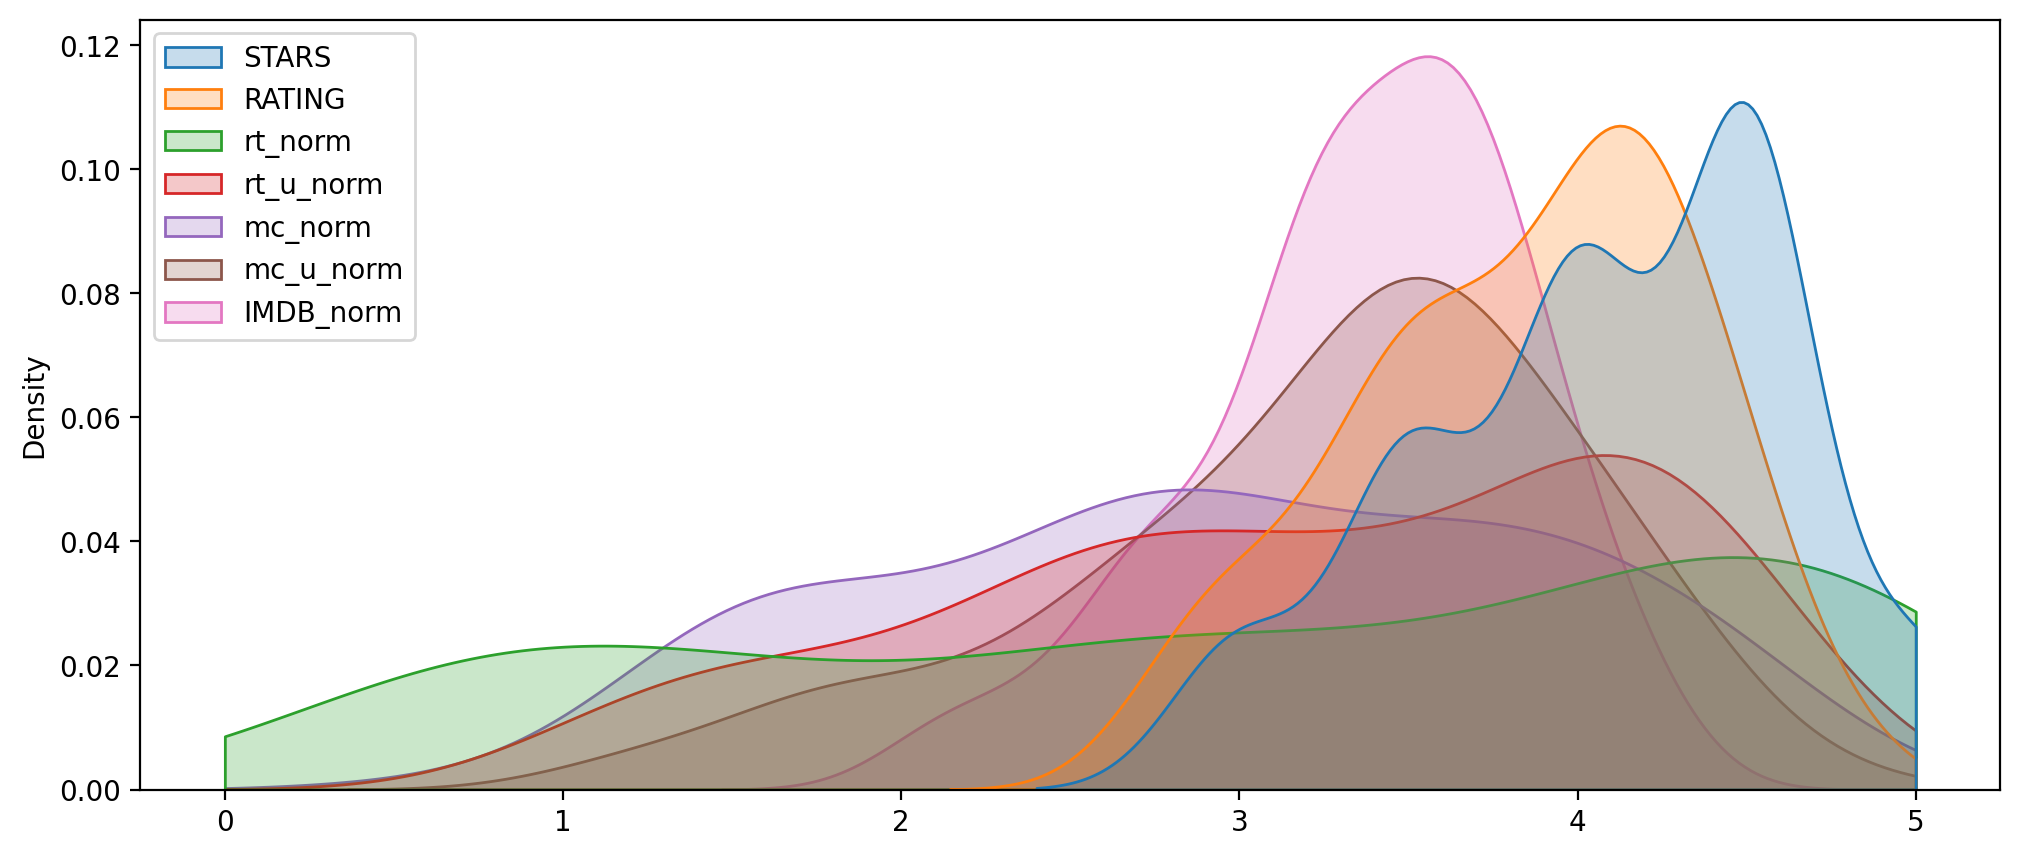

In [72]:
fig,ax = plt.subplots(figsize=(12,5),dpi=200)
sns.kdeplot(data=norm_scores,clip=[0,5],fill=True,ax=ax)


move_legend(ax, "upper left")

A KDE plot has been generated to directly compare the distribution of Rotten Tomatoes (RT) critic ratings with the displayed STARS by Fandango. This comparison reveals the differences in the distributions of ratings between the two sources, highlighting Fandango's uneven distribution compared to the more uniform distribution of RT critics.

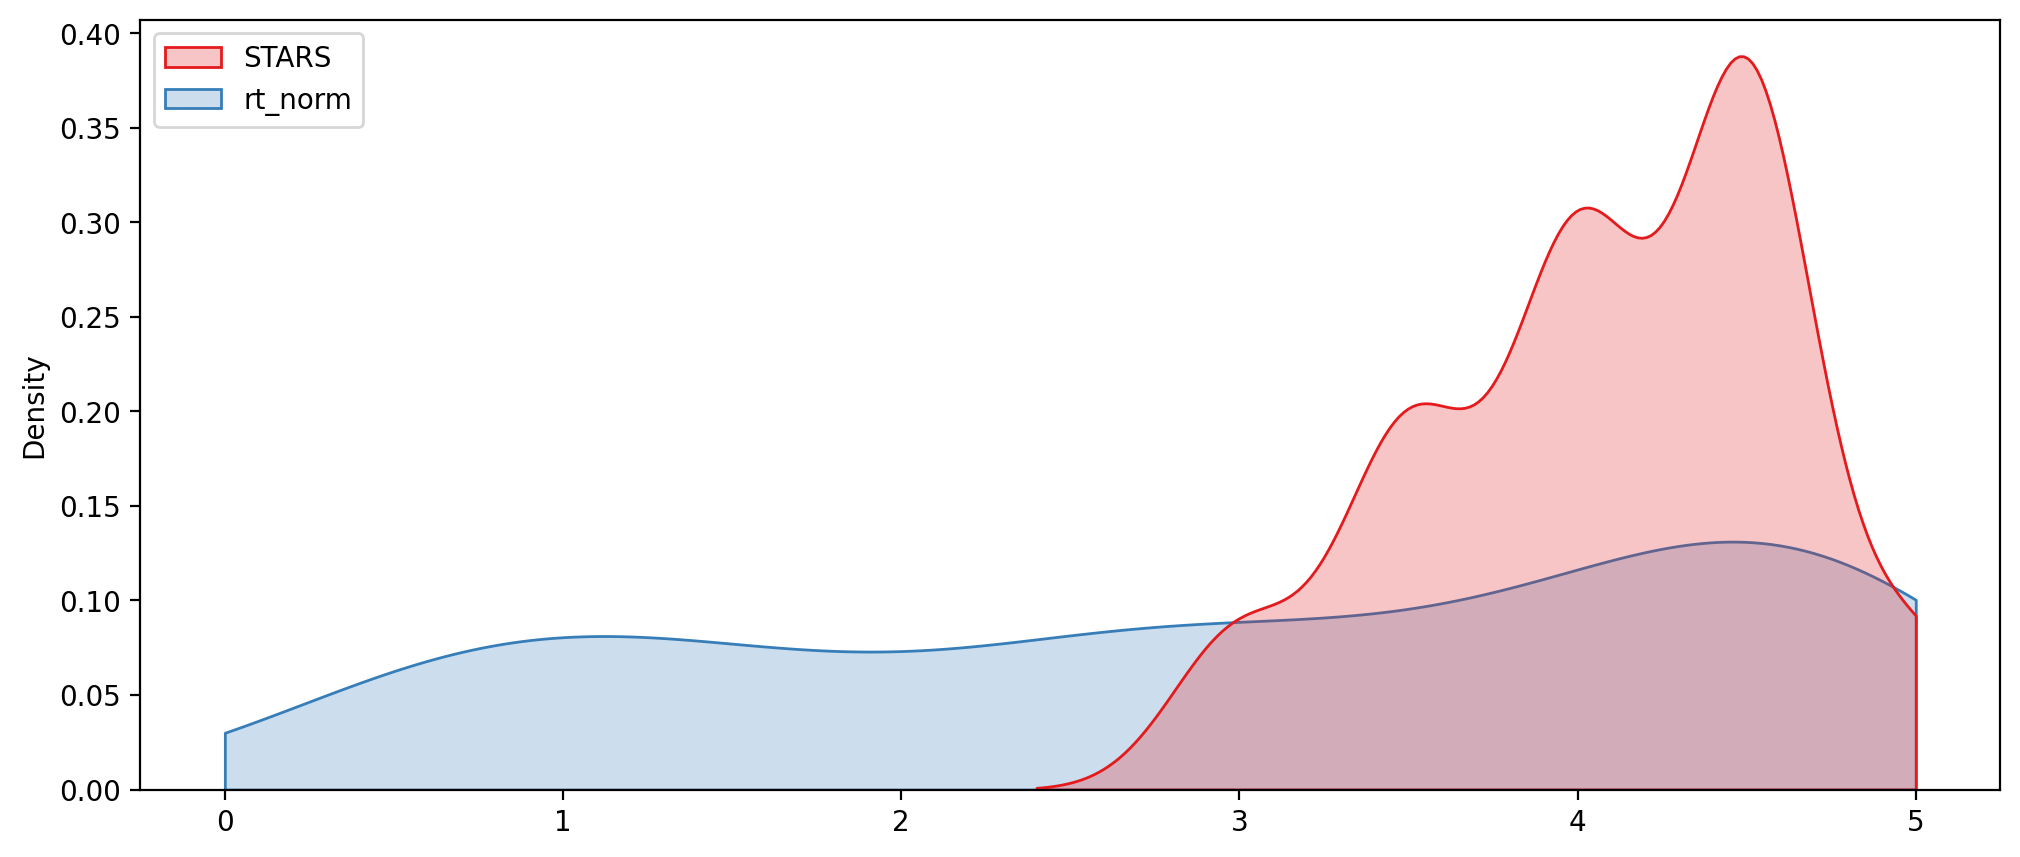

In [73]:
fig,ax = plt.subplots(figsize=(12,5),dpi=200)
sns.kdeplot(data=norm_scores[['STARS','rt_norm']],clip=[0,5],fill=True,palette='Set1',ax=ax)


move_legend(ax, "upper left")

### How are the worst movies rated across all platforms?

A clustermap visualization of all normalized scores has been created to observe the differences in ratings. Highly rated movies are expected to cluster together, while poorly rated movies should form their own clusters. Note that the FILM titles have been dropped for this clustermap.

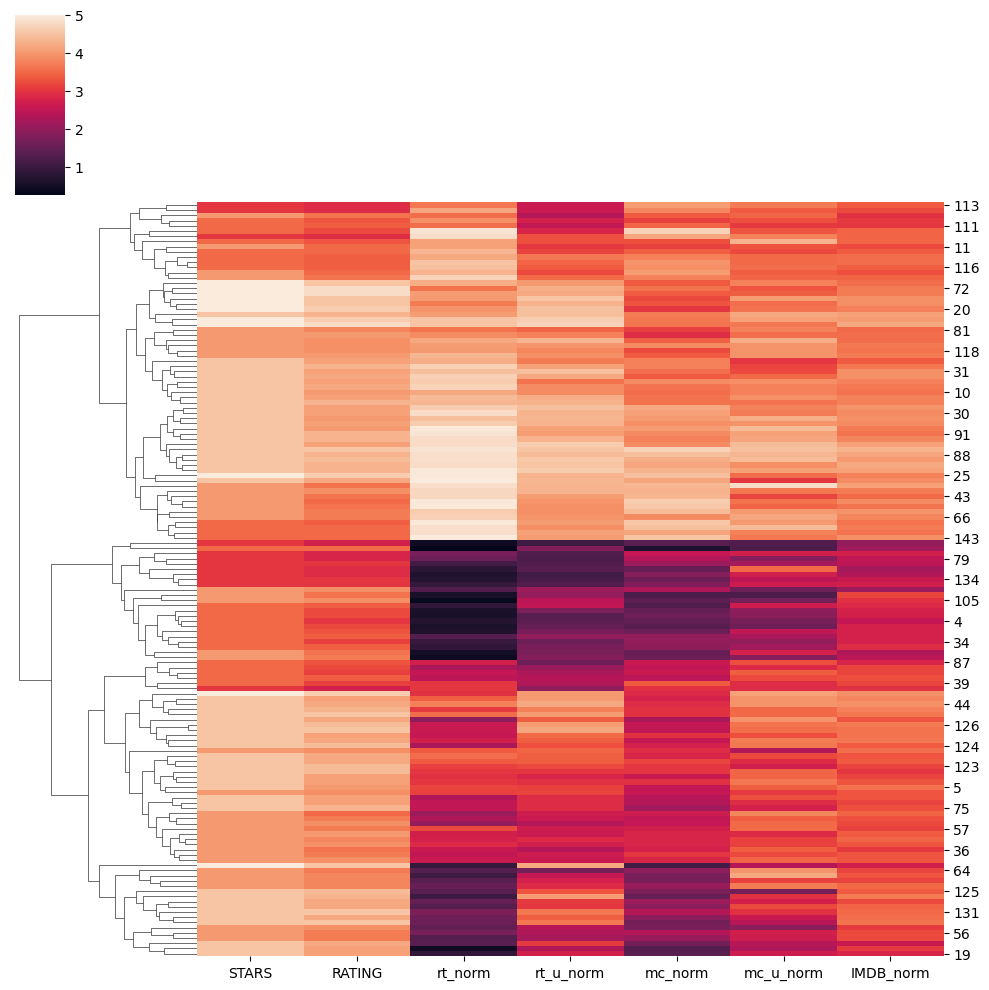

In [74]:
sns.clustermap(norm_scores,col_cluster=False)


It's evident that Fandango consistently rates movies much higher compared to other sites, especially considering that it further rounds up the ratings displayed to users. This discrepancy suggests a potential inflation of movie ratings on the Fandango platform.

The top 10 worst movies based on Rotten Tomatoes critic ratings have been identified. Additionally, the normalized scores across all platforms for these movies have been calculated. To facilitate this analysis, the FILM column has been added back to the DataFrame of normalized scores.

In [77]:
norm_scores['FILM'] = combined_df['FILM']
worst_10 = norm_scores.nsmallest(10,columns='rt_norm')
worst_10

C:\Users\Srivathsan M\AppData\Local\Temp\ipykernel_8444\2155936329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_scores['FILM'] = combined_df['FILM']


,STARS,RATING,rt_norm,rt_u_norm,mc_norm,mc_u_norm,IMDB_norm,FILM
132,3.5,3.5,0.25,1.80,0.65,1.20,2.15,Paul Blart: Mall Cop 2 (2015)
105,4.0,3.9,0.35,2.45,1.40,1.65,2.95,Hitman: Agent 47 (2015)
53,4.0,3.7,0.40,1.85,1.55,1.85,2.45,Hot Pursuit (2015)
15,4.5,4.1,0.45,2.30,1.30,2.30,3.05,Taken 3 (2015)
48,3.0,2.7,0.45,1.00,1.35,1.25,2.00,Fantastic Four (2015)
33,4.0,3.6,0.50,1.75,1.50,2.75,2.30,The Boy Next Door (2015)
35,4.0,3.6,0.55,2.00,1.20,1.20,3.15,The Loft (2015)
60,3.5,3.2,0.55,1.35,1.60,1.90,2.70,Unfinished Business (2015)
58,3.5,3.2,0.60,1.75,1.50,1.95,2.75,Seventh Son (2015)
59,3.5,3.2,0.60,1.50,1.35,1.60,2.75,Mortdecai (2015)


A visualization depicting the distribution of ratings across all sites for the top 10 worst movies has been generated. This visualization provides insights into how these movies are rated across different platforms, highlighting any disparities or similarities in their ratings.

<Axes: ylabel='Density'>

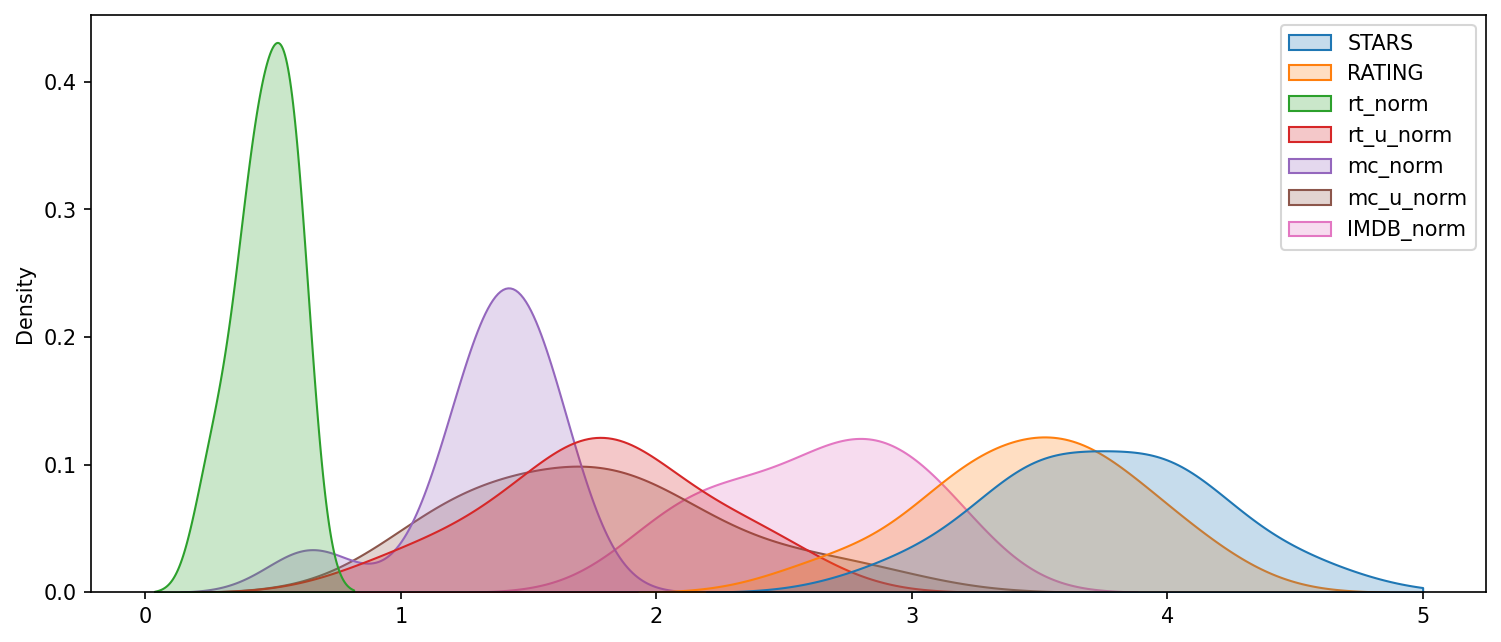

In [78]:
plt.subplots(figsize=(12,5),dpi=150)
sns.kdeplot(worst_10,fill=True,clip=[0,5])

Indeed, the analysis reveals a significant disparity in Fandango's ratings, particularly for movies that are widely regarded as poor by other platforms. Taken 3 stands out as a striking example, with Fandango displaying a rating of 4.5 stars despite its much lower average rating across other platforms. This highlights a noteworthy discrepancy in Fandango's rating system, which may mislead users about the quality of certain films.

It's astounding to observe Fandango's tendency to display significantly higher ratings for movies that are widely recognized as poor quality. Taken 3 is a prime example, with Fandango presenting it with a rating of 4.5 stars, while it holds an average rating of only 1.86 across other platforms. This stark contrast underscores the potential for misleading users about a film's quality.